In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,confusion_matrix ,
    precision_score, recall_score, classification_report)



# analise inicial

In [107]:
dados = pd.read_csv("predictive_maintenance.csv")

In [108]:
dados.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [109]:
colunas = ['ID Unico', 'ID Produto', 'Tipo', 'Temperatura do ar [K]', 'Temperatura do processo [K]', 'Velocidade de rotação [rpm]', 'Torque [Nm]', 'Desgaste ferramenta [min]', 'Falhou','Tipo de falha'  ]

In [110]:
dados.columns = colunas
dados.head()

,ID Unico,ID Produto,Tipo,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [111]:
linhas, colunas = dados.shape

In [112]:
print(f"{linhas} linhas por {colunas} colunas")

10000 linhas por 10 colunas


In [113]:
dados_nulos = dados.isnull().sum()

In [114]:
dados_nulos

,0
ID Unico,0
ID Produto,0
Tipo,0
Temperatura do ar [K],0
Temperatura do processo [K],0
Velocidade de rotação [rpm],0
Torque [Nm],0
Desgaste ferramenta [min],0
Falhou,0
Tipo de falha,0


percebemos que o data set nao possui dados nulos

verificar os tipos de dados do dataset

In [115]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID Unico                     10000 non-null  int64  
 1   ID Produto                   10000 non-null  object 
 2   Tipo                         10000 non-null  object 
 3   Temperatura do ar [K]        10000 non-null  float64
 4   Temperatura do processo [K]  10000 non-null  float64
 5   Velocidade de rotação [rpm]  10000 non-null  int64  
 6   Torque [Nm]                  10000 non-null  float64
 7   Desgaste ferramenta [min]    10000 non-null  int64  
 8   Falhou                       10000 non-null  int64  
 9   Tipo de falha                10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# analise visual

In [116]:
dados.head()

,ID Unico,ID Produto,Tipo,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [117]:
print(dados["Tipo"].unique())

['M' 'L' 'H']


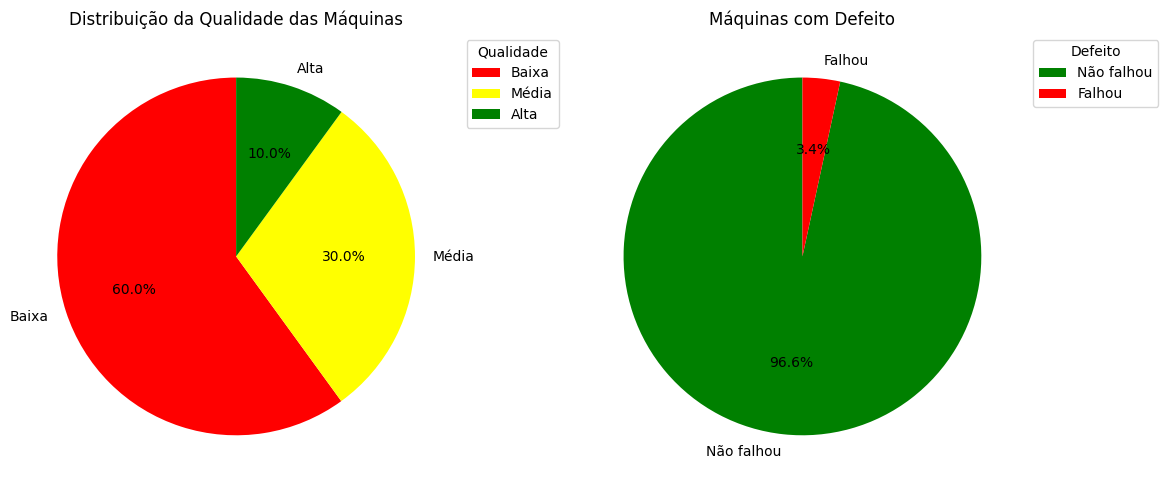

In [118]:

fig, ax = plt.subplots(1, 2, figsize=(12,5))

size1 = dados['Tipo'].value_counts()
labels1 = ['Baixa', 'Média', 'Alta']
cores1 = ['red', 'yellow', 'green']

ax[0].pie(size1, labels=labels1, colors=cores1, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Distribuição da Qualidade das Máquinas")
ax[0].legend(labels1, title="Qualidade", loc="upper left", bbox_to_anchor=(1,1))

size2 = dados['Falhou'].value_counts()
labels2 = ['Não falhou', 'Falhou']
cores2 = ['green', 'red']

ax[1].pie(size2, labels=labels2, colors=cores2, autopct='%1.1f%%', startangle=90)
ax[1].set_title("Máquinas com Defeito")
ax[1].legend(labels2, title="Defeito", loc="upper left", bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


#  Tratamento de Features


In [119]:
dados.head()

,ID Unico,ID Produto,Tipo,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [120]:
X = dados.drop(['ID Produto', 'ID Unico'], axis=1) # dados s/ as labels 'Inuteis' (tratamento de features)

In [121]:
X.head()

,Tipo,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [122]:
X.drop_duplicates()

,Tipo,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


Número de dados duplicados: 0


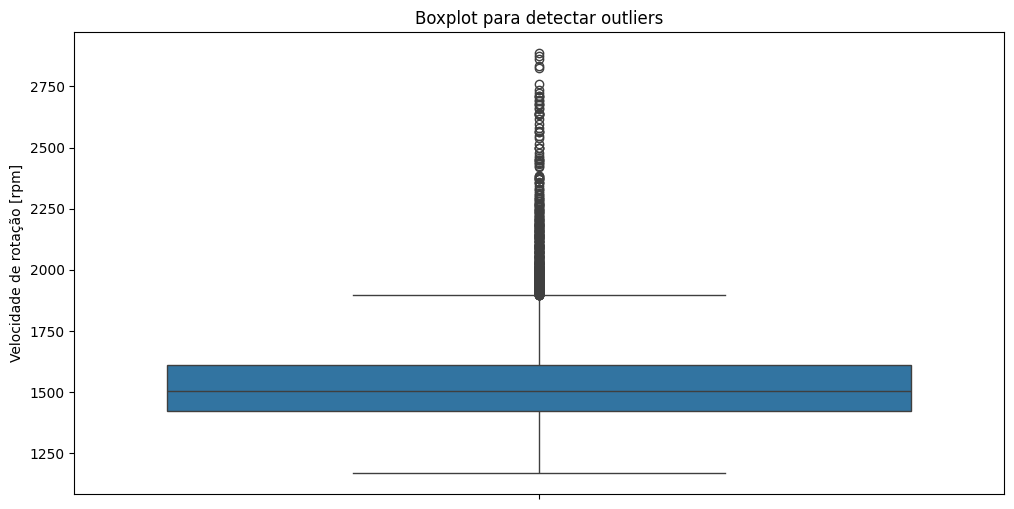

In [123]:
# Imprime informações relevantes à limpeza
# Verificar a presença de dados duplicados
duplicates = X.duplicated().sum()
print("Número de dados duplicados:", duplicates)
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X['Velocidade de rotação [rpm]'])
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

Número de dados duplicados: 0


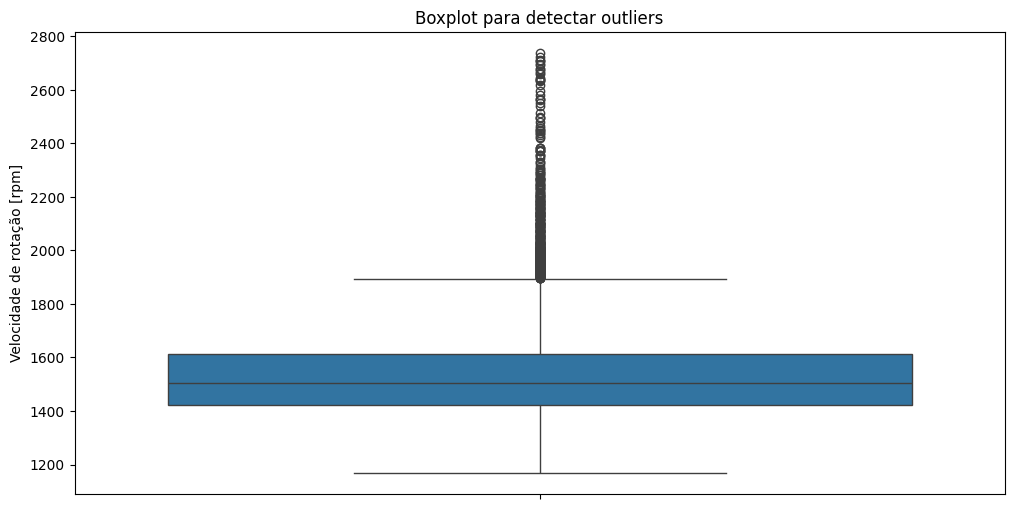

In [124]:
dados_novos = X[X['Velocidade de rotação [rpm]'] < 2750]
# Imprime informações relevantes à limpeza
# Verificar a presença de dados duplicados
duplicates = dados_novos.duplicated().sum()
print("Número de dados duplicados:", duplicates)
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_novos['Velocidade de rotação [rpm]'])
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

In [125]:
dados_novos.head()

,Tipo,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [126]:
dados_novos["Tipo"].unique()

array(['M', 'L', 'H'], dtype=object)

In [127]:

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])  # ordem manual
dados_novos['Tipo_Encoded'] = encoder.fit_transform(dados_novos[['Tipo']])


/tmp/ipython-input-1189166594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['Tipo_Encoded'] = encoder.fit_transform(dados_novos[['Tipo']])


In [128]:
dados_novos.head()

,Tipo,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha,Tipo_Encoded
0,M,298.1,308.6,1551,42.8,0,0,No Failure,1.0
1,L,298.2,308.7,1408,46.3,3,0,No Failure,0.0
2,L,298.1,308.5,1498,49.4,5,0,No Failure,0.0
3,L,298.2,308.6,1433,39.5,7,0,No Failure,0.0
4,L,298.2,308.7,1408,40.0,9,0,No Failure,0.0


In [129]:
dados_novos = dados_novos.drop(['Tipo'], axis=1)

In [130]:
dados_novos.head()

,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Falhou,Tipo de falha,Tipo_Encoded
0,298.1,308.6,1551,42.8,0,0,No Failure,1.0
1,298.2,308.7,1408,46.3,3,0,No Failure,0.0
2,298.1,308.5,1498,49.4,5,0,No Failure,0.0
3,298.2,308.6,1433,39.5,7,0,No Failure,0.0
4,298.2,308.7,1408,40.0,9,0,No Failure,0.0


In [131]:

X = dados_novos.drop(['Tipo de falha', 'Falhou'], axis=1)
Y = dados_novos['Falhou']

In [132]:
X

,Temperatura do ar [K],Temperatura do processo [K],Velocidade de rotação [rpm],Torque [Nm],Desgaste ferramenta [min],Tipo_Encoded
0,298.1,308.6,1551,42.8,0,1.0
1,298.2,308.7,1408,46.3,3,0.0
2,298.1,308.5,1498,49.4,5,0.0
3,298.2,308.6,1433,39.5,7,0.0
4,298.2,308.7,1408,40.0,9,0.0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,1.0
9996,298.9,308.4,1632,31.8,17,2.0
9997,299.0,308.6,1645,33.4,22,1.0
9998,299.0,308.7,1408,48.5,25,2.0


In [133]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
print(f"Tamanho do conjunto original: {X.shape}")
print(f"Tamanho do conjunto para treino: {x_train.shape}")
print(f"Tamanho do conjunto para teste: {x_test.shape}")


Tamanho do conjunto original: (9994, 6)
Tamanho do conjunto para treino: (6995, 6)
Tamanho do conjunto para teste: (2999, 6)


In [134]:
modelo_atualizado = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

modelo_atualizado.fit(x_train, y_train)

y_pred_atualizado = modelo_atualizado.predict(x_test)

In [135]:

log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(x_train, y_train)
y_pred_lr = log_reg_model.predict(x_test)

In [136]:


def avaliar_modelo_acuracia(nome, y_true, y_pred):
    print(f"\n=== {nome} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))

def avaliar_modelo_report(nome, y_true, y_pred, y_prob=None):

    print(f"\n=== {nome} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
    print("F1-Score :", f1_score(y_true, y_pred, zero_division=0))


def avaliar_modelo_matriz_confusao(nome, y_true, y_pred):
    print(f"\n=== {nome} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Predict')
    plt.ylabel('Real')
    plt.show()

In [137]:
avaliar_modelo_report(modelo_atualizado, y_test, y_pred_atualizado)


=== RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42) ===
Accuracy : 0.9813271090363455
Precision: 0.8596491228070176
Recall   : 0.5051546391752577
F1-Score : 0.6363636363636364



=== RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42) ===
Confusion Matrix:
 [[2894    8]
 [  48   49]]


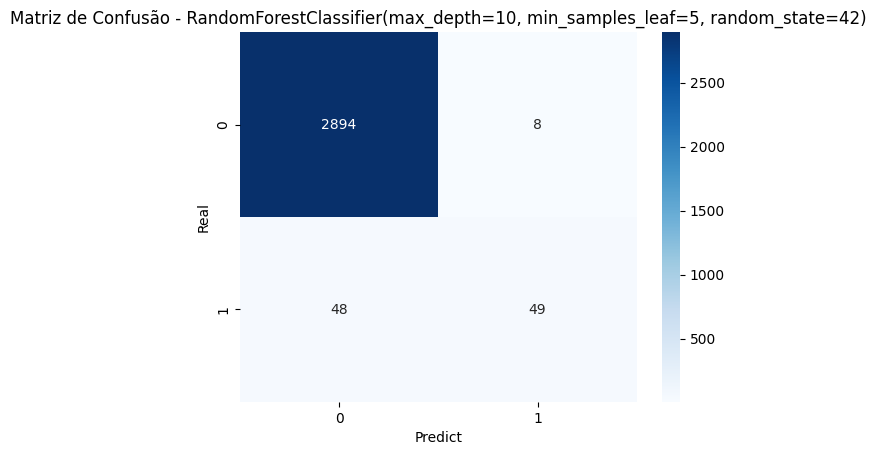

In [138]:
avaliar_modelo_matriz_confusao(modelo_atualizado, y_test, y_pred_atualizado)

In [139]:
modelo_atualizadov2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

modelo_atualizadov2.fit(x_train, y_train)

y_pred_atualizado = modelo_atualizadov2.predict(x_test)

In [140]:
avaliar_modelo_report(modelo_atualizadov2, y_test, y_pred_atualizado)


=== RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=300,
                       random_state=42) ===
Accuracy : 0.9829943314438147
Precision: 0.8833333333333333
Recall   : 0.5463917525773195
F1-Score : 0.6751592356687898


In [141]:
modelo_gb = GradientBoostingClassifier(
    n_estimators=500,
    max_depth=5,
    min_samples_leaf=2,
    max_features='sqrt',
    learning_rate=0.25,
    random_state=42
)
modelo_gb.fit(x_train, y_train)
y_pred_Gradient = modelo_gb.predict(x_test)
# Probabilidade da classe positiva (para AUC-ROC)
y_prob_gb = modelo_gb.predict_proba(x_test)[:, 1]



=== Gradient Boosting ===
Accuracy : 0.9773257752584195
Precision: 0.6355140186915887
Recall   : 0.7010309278350515
F1-Score : 0.6666666666666666

=== RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42) ===
Confusion Matrix:
 [[2863   39]
 [  29   68]]


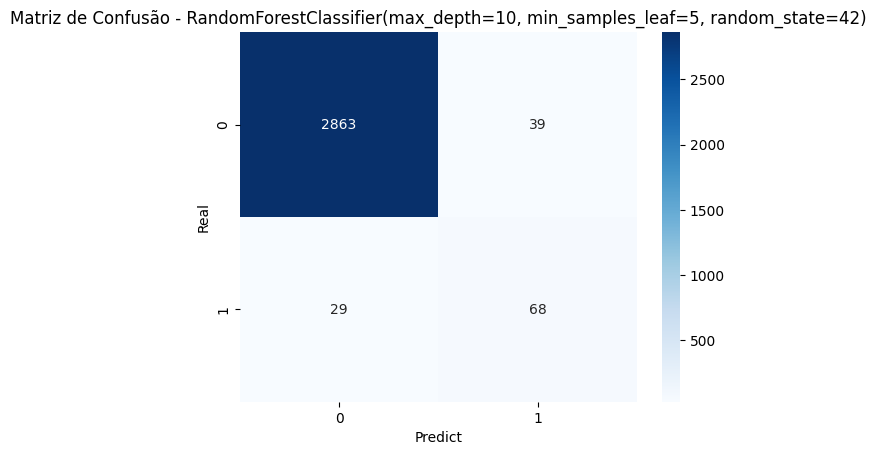

In [158]:
threshold = 0.0005
y_pred_custom = (y_prob_gb >= threshold).astype(int)
avaliar_modelo_report("Gradient Boosting", y_test, y_pred_custom, y_prob_gb)
avaliar_modelo_matriz_confusao(modelo_atualizado, y_test, y_pred_custom)